In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import the file with results

with open("results/FastTextExperimentsResults-all-representations-updated_stopwords_added.json") as result_file:
    results = json.load(result_file)

print(len(results))
print(results[0])

80
{'microF1': 0.5602836879432624, 'macroF1': 0.589250077482907, 'label_scores': {'__label__Information/Explanation': 0.5423728813559322, '__label__Promotion': 0.5882352941176471, '__label__News': 0.5842696629213482, '__label__Forum': 0.8, '__label__Opinion/Argumentation': 0.4313725490196078}, 'run': 0, 'experiment': 'baseline_text'}


In [4]:
results_df = pd.DataFrame(results)

results_df.head()

,microF1,macroF1,label_scores,run,experiment
0,0.560284,0.58925,{'__label__Information/Explanation': 0.5423728...,0,baseline_text
1,0.560284,0.58925,{'__label__Information/Explanation': 0.5423728...,1,baseline_text
2,0.560284,0.58925,{'__label__Information/Explanation': 0.5423728...,2,baseline_text
3,0.560284,0.58925,{'__label__Information/Explanation': 0.5423728...,3,baseline_text
4,0.560284,0.58925,{'__label__Information/Explanation': 0.5423728...,4,baseline_text


In [5]:
experiment_list = list(results_df.experiment.unique())

experiment_list

['baseline_text',
 'lowercase',
 'nopunctuation',
 'nonumbers',
 'lowercase_nopunct_nodigits',
 'lemmas',
 'upos',
 'xpos',
 'dependency',
 'ner',
 'stopwords_removed',
 'only_stopwords',
 'only_subjective_classes',
 'only_nouns_verbs',
 'preprocessed_text']

In [6]:
preprocessing_steps_df = results_df[results_df["experiment"] == "lowercase_nopunct_nodigits"]
preprocessing_steps_df

,microF1,macroF1,label_scores,run,experiment
20,0.560284,0.59758,{'__label__Information/Explanation': 0.5714285...,0,lowercase_nopunct_nodigits
21,0.560284,0.59758,{'__label__Information/Explanation': 0.5714285...,1,lowercase_nopunct_nodigits
22,0.560284,0.59758,{'__label__Information/Explanation': 0.5714285...,2,lowercase_nopunct_nodigits
23,0.560284,0.59758,{'__label__Information/Explanation': 0.5714285...,3,lowercase_nopunct_nodigits
24,0.560284,0.59758,{'__label__Information/Explanation': 0.5714285...,4,lowercase_nopunct_nodigits


## LateX Table with average scores

In [7]:
# Get a Latex table with mean and std results

average_result_list = []

for element in experiment_list:
    element_average = []
    element_average.append(element)
    # Create a new dataframe of values from selected experiment
    element_df = results_df[results_df["experiment"] == element]
    # Calculate a mean and std of a specific column
    micro_mean = round(element_df.microF1.mean(),3)
    micro_std = round(element_df.microF1.std(),2)
    element_average.append(micro_mean)
    element_average.append(micro_std)
    macro_mean = round(element_df.macroF1.mean(),3)
    macro_std = round(element_df.macroF1.std(),2)
    element_average.append(macro_mean)
    element_average.append(macro_std)
    average_result_list.append(element_average)

average_result_list

[['baseline_text', 0.56, 0.0, 0.589, 0.0],
 ['lowercase', 0.553, 0.01, 0.587, 0.01],
 ['nopunctuation', 0.58, 0.0, 0.616, 0.0],
 ['nonumbers', 0.583, 0.0, 0.595, 0.0],
 ['lowercase_nopunct_nodigits', 0.56, 0.0, 0.598, 0.0],
 ['lemmas', 0.597, 0.01, 0.601, 0.0],
 ['upos', 0.54, 0.01, 0.547, 0.01],
 ['xpos', 0.563, 0.01, 0.536, 0.02],
 ['dependency', 0.61, 0.0, 0.639, 0.0],
 ['ner', 0.377, 0.01, 0.255, 0.01],
 ['stopwords_removed', 0.563, 0.01, 0.535, 0.02],
 ['only_stopwords', 0.526, 0.01, 0.559, 0.01],
 ['only_subjective_classes', 0.468, 0.01, 0.408, 0.02],
 ['only_nouns_verbs', 0.496, 0.01, 0.439, 0.02],
 ['preprocessed_text', 0.596, 0.0, 0.597, 0.0]]

In [8]:
print("\\toprule")
print("\\textbf{Representation} & \\textbf{Micro F1} & \\textbf{Macro F1}\\\\")
print("\midrule")

for element in average_result_list:
    print(element[0], "&", element[1], "$\pm$", element[2], "&", element[3], "$\pm$", element[4], "\\\\")


\toprule
\textbf{Representation} & \textbf{Micro F1} & \textbf{Macro F1}\\
\midrule
baseline_text & 0.56 $\pm$ 0.0 & 0.589 $\pm$ 0.0 \\
lowercase & 0.553 $\pm$ 0.01 & 0.587 $\pm$ 0.01 \\
nopunctuation & 0.58 $\pm$ 0.0 & 0.616 $\pm$ 0.0 \\
nonumbers & 0.583 $\pm$ 0.0 & 0.595 $\pm$ 0.0 \\
lowercase_nopunct_nodigits & 0.56 $\pm$ 0.0 & 0.598 $\pm$ 0.0 \\
lemmas & 0.597 $\pm$ 0.01 & 0.601 $\pm$ 0.0 \\
upos & 0.54 $\pm$ 0.01 & 0.547 $\pm$ 0.01 \\
xpos & 0.563 $\pm$ 0.01 & 0.536 $\pm$ 0.02 \\
dependency & 0.61 $\pm$ 0.0 & 0.639 $\pm$ 0.0 \\
ner & 0.377 $\pm$ 0.01 & 0.255 $\pm$ 0.01 \\
stopwords_removed & 0.563 $\pm$ 0.01 & 0.535 $\pm$ 0.02 \\
only_stopwords & 0.526 $\pm$ 0.01 & 0.559 $\pm$ 0.01 \\
only_subjective_classes & 0.468 $\pm$ 0.01 & 0.408 $\pm$ 0.02 \\
only_nouns_verbs & 0.496 $\pm$ 0.01 & 0.439 $\pm$ 0.02 \\
preprocessed_text & 0.596 $\pm$ 0.0 & 0.597 $\pm$ 0.0 \\


## Plots

In [9]:
def average_label_scores(representation):
    """
    This function takes the label scores from the results list for a chosen representation (value in "experiment")
    and returns a list containing a list of averages and a list of stds.
    """
    average_label_score = {"Info":[], "Promotion":[], "News": [], "Forum": [], "Opinion": []}


    for element in results:
        if element["experiment"] == representation:
            average_label_score["Info"].append(element["label_scores"]["__label__Information/Explanation"])
            average_label_score["Promotion"].append(element["label_scores"]["__label__Promotion"])
            average_label_score["News"].append(element["label_scores"]["__label__News"])
            average_label_score["Forum"].append(element["label_scores"]["__label__Forum"])
            average_label_score["Opinion"].append(element["label_scores"]["__label__Opinion/Argumentation"])

    list_of_averages = [np.array(average_label_score["Info"]).mean(),np.array(average_label_score["Promotion"]).mean(), np.array(average_label_score["News"]).mean(), np.array(average_label_score["Forum"]).mean(), np.array(average_label_score["Opinion"]).mean()]
    list_of_stds = [np.array(average_label_score["Info"]).std(),np.array(average_label_score["Promotion"]).std(), np.array(average_label_score["News"]).std(), np.array(average_label_score["Forum"]).std(), np.array(average_label_score["Opinion"]).std()]

    return [list_of_averages, list_of_stds]

['baseline_text',
 'lowercase',
 'nopunctuation',
 'nonumbers',
 'lowercase_nopunct_nodigits',
 'lemmas',
 'upos',
 'xpos',
 'dependency',
 'ner',
 'stopwords_removed',
 'only_stopwords',
 'only_subjective_classes',
 'only_nouns_verbs']

In [10]:
baseline_label_scores = average_label_scores('baseline_text')
baseline_label_scores

[[0.5423728813559322,
  0.5882352941176471,
  0.5842696629213482,
  0.8,
  0.4313725490196078],
 [0.0, 0.0, 0.0, 0.0, 0.0]]

In [11]:
preprocessed_label_scores = average_label_scores('preprocessed_text')
preprocessed_label_scores

[[0.5333333333333333,
  0.6628571428571428,
  0.6352619398274774,
  0.7142857142857143,
  0.4390243902439025],
 [0.0,
  0.004665694748158418,
  0.0031952106890923127,
  0.0,
  5.551115123125783e-17]]

In [29]:
lemmas_label_scores = average_label_scores('lemmas')
upos_label_scores = average_label_scores('upos')
xpos_label_scores = average_label_scores('xpos')
dependency_label_scores = average_label_scores('dependency')
xpos_label_scores

[[0.5898378378378378,
  0.5218726244553629,
  0.6834208023669472,
  0.6185714285714285,
  0.26793650793650786],
 [0.003883875628196766,
  0.008409240353250897,
  0.005808337777032943,
  0.07911643590834339,
  0.01968253968253967]]

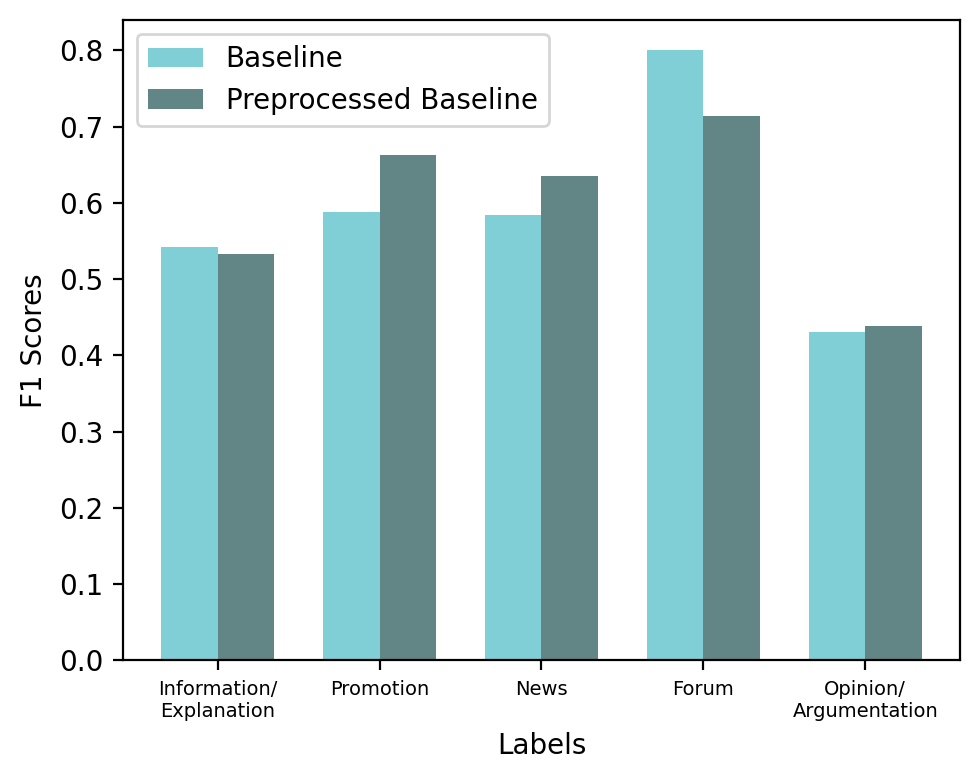

In [13]:
# Bar Plot:
labels_names = ['Information/\nExplanation', 'Promotion', 'News', 'Forum', 'Opinion/\nArgumentation']

x = np.arange(len(labels_names))
# the width of the bars
width = 0.35

fig, ax = plt.subplots(figsize=(5,4), dpi=200)
rects1 = ax.bar(x - width/2, baseline_label_scores[0], width, label='Baseline', color=['#80ced6'])
rects2 = ax.bar(x + width/2, preprocessed_label_scores[0], width, label='Preprocessed Baseline', color=['#618685'])


plt.xticks(fontsize=7)
ax.set_xticks(x, labels_names)
ax.set_xlabel('Labels', size = 10)
ax.set_ylabel('F1 Scores', size = 10)
ax.legend(prop={'size': 10})
#ax.set_ylim([0.4,0.9])

fig.tight_layout()

#plt.savefig(f"final-plot-baseline-preprocessed-baseline-label-scores.png")
plt.show()

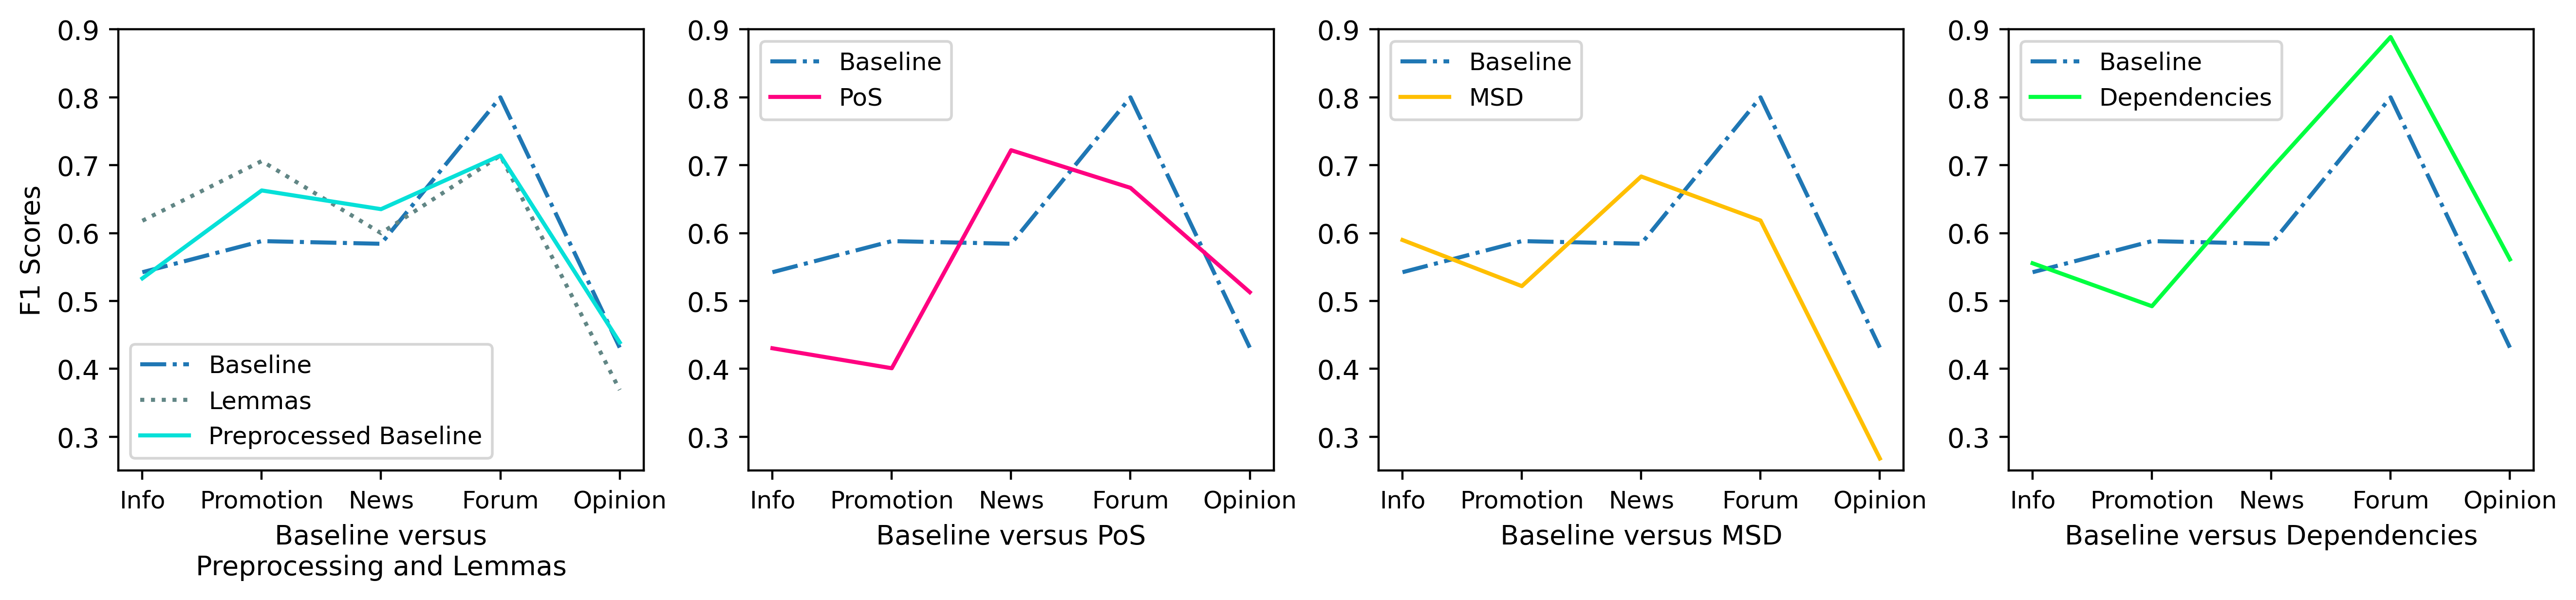

In [27]:
# Line Plot:
labels_names = ['Info', 'Promotion', 'News', 'Forum', 'Opinion']

plt.figure(figsize=(16,3), dpi=400)
plt.subplots_adjust(hspace=0.2)

ax = plt.subplot(1,4,1)
ax.errorbar(labels_names, baseline_label_scores[0], label="Baseline", capsize=3, ls= "-.")
ax.errorbar(labels_names, lemmas_label_scores[0], label='Lemmas', color='#618685', capsize=3, ls= ":")
ax.errorbar(labels_names, preprocessed_label_scores[0], label='Preprocessed Baseline', color='#06e0d8', capsize=3)
plt.xticks(fontsize=9)
ax.set_ylabel('F1 Scores', size=10)
ax.set_xlabel("Baseline versus\nPreprocessing and Lemmas")
ax.legend(loc="lower left",prop={'size': 9})
plt.axis([-0.2,4.2,0.25,0.9])

ax = plt.subplot(1,4,2)
ax.errorbar(labels_names, baseline_label_scores[0], label="Baseline", capsize=3, ls="-.")
ax.errorbar(labels_names, upos_label_scores[0], label='PoS', color='#ff0080', capsize=3)
plt.xticks(fontsize=9)
#ax.set_xlabel('Labels')
#ax.set_ylabel('F1 Scores')
ax.set_xlabel("Baseline versus PoS")
ax.legend(loc="upper left",prop={'size': 9})
plt.axis([-0.2,4.2,0.25,0.9])

ax = plt.subplot(1,4,3)
ax.errorbar(labels_names, baseline_label_scores[0], label="Baseline", capsize=3, ls= "-.")
ax.errorbar(labels_names, xpos_label_scores[0], label='MSD', color='#ffbf00', capsize=3)
plt.xticks(fontsize=9)
#ax.set_ylabel('F1 Scores', size=8)
ax.set_xlabel("Baseline versus MSD")
ax.legend(loc="upper left",prop={'size': 9})
plt.axis([-0.2,4.2,0.25,0.9])

ax = plt.subplot(1,4,4)
ax.errorbar(labels_names, baseline_label_scores[0], label="Baseline", capsize=3, ls="-.")
ax.errorbar(labels_names, dependency_label_scores[0], label='Dependencies', color='#00ff40', capsize=3)
plt.xticks(fontsize=9)
#ax.set_xlabel('Labels')
#ax.set_ylabel('F1 Scores')
ax.set_xlabel("Baseline versus Dependencies")
ax.legend(loc="upper left",prop={'size': 9})
plt.axis([-0.2,4.2,0.25,0.9])

fig.tight_layout()

plt.savefig(f"final-plot-baseline-linguistic-features-scores.png")
plt.show()

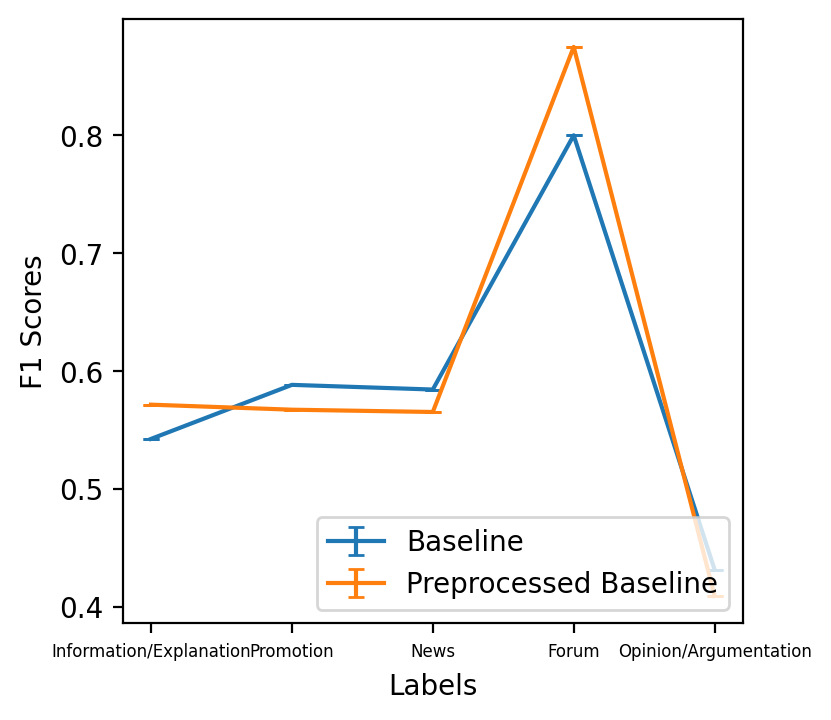

In [ ]:
# Line Plot:
labels_names = ['Information/Explanation', 'Promotion', 'News', 'Forum', 'Opinion/Argumentation']

fig, ax = plt.subplots(figsize=(4,4), dpi=200)
ax.errorbar(labels_names, baseline_label_scores[0], yerr=baseline_label_scores[1], label="Baseline", capsize=3)
ax.errorbar(labels_names, preprocessed_label_scores[0], yerr=preprocessed_label_scores[1], label="Preprocessed Baseline", capsize=3)
plt.xticks(fontsize=6)
ax.set_xlabel('Labels')
ax.set_ylabel('F1 Scores')
ax.legend(loc="lower right")
#ax.set_xlabel("Impact of the Size of the Slovene Pre-Training Data on the Micro and Macro F1")
#plt.savefig(f"..\results\final-plot-baseline-preprocessed-baseline-label-scores.png")
plt.show()